# PROBLEM STATEMENT


On this Project we will distinguish customer into several groups to determine the appropriate treatment 

# Data Dictionary 

1. CUSTID : Identification of Credit Card holder (Categorical)
2. BALANCE : Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES : Amount of purchases made from account
5. ONEOFFPURCHASES : Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES : Amount of purchase done in installment
7. CASHADVANCE : Cash in advance given by the user
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
8. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
9. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
10. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
11. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
12. PURCHASESTRX : Numbe of purchase transactions made
13. CREDITLIMIT : Limit of Credit Card for user
14. PAYMENTS : Amount of Payment done by user
15. MINIMUM_PAYMENTS : Minimum amount of payments made by user
16. PRCFULLPAYMENT : Percent of full payment paid by user
17. TENURE : Tenure of credit card service for user

In [ ]:
import pandas as pd
import numpy as np

# Package for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Package for cleaning, modelling, and model evaluation 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.simplefilter("ignore")

# Load Dataset

In [ ]:
df=pd.read_csv('CC_Clustering.csv')
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Pre-processing Data

This step includes checking data types, checking data summary, and handling missing values.

In [ ]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Observation:
1. There are missing value in credit limit and minimum payments
2. Column types are coreect
3. There are 1 object, 3 integers, and 13 float

In [ ]:
#data description
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Observations:
1. The average of customers'balance is 1564.47. The balance range from 0 to 19043.13
2. The avarage of balance frequency is 0.877 it means that customer often updating their saldo
3. There are 8950 purcaheses by customer
4. The average of one offf purcase is 592, with min purchace is 0, and max purchase s 49039.57
5. The average of installments purchase is 411.07, with min value is 0, and max value is 22500
6. The average of cash advance is 978.87 with min cash advance is 0, and max value is 47136.21
7. The average of purchase frequency is 0.490351, it means that the customer doesn't purchase often

In [ ]:
df.describe(include='object')

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


In the cust id column we can finde many unique value. We decide to drop them because this column doesn't contain meaningfull information.

In [ ]:
#check duplicated value
duplicatesN = df[df.duplicated()]['CUST_ID'].count()
print(f"Number of duplicated entries: {duplicatesN}")

Number of duplicated entries: 0


There's no duplicated column

In [ ]:
#drop CUST_ID column
data= df.drop('CUST_ID',axis=1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Handling Missing Value

In [ ]:
#chech missing value
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In credit limit and minimum payments contain small missing value, So, we decide to drop them

In [ ]:
data = data.dropna().reset_index(drop=True)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Eksploration Data Analysis

In [ ]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

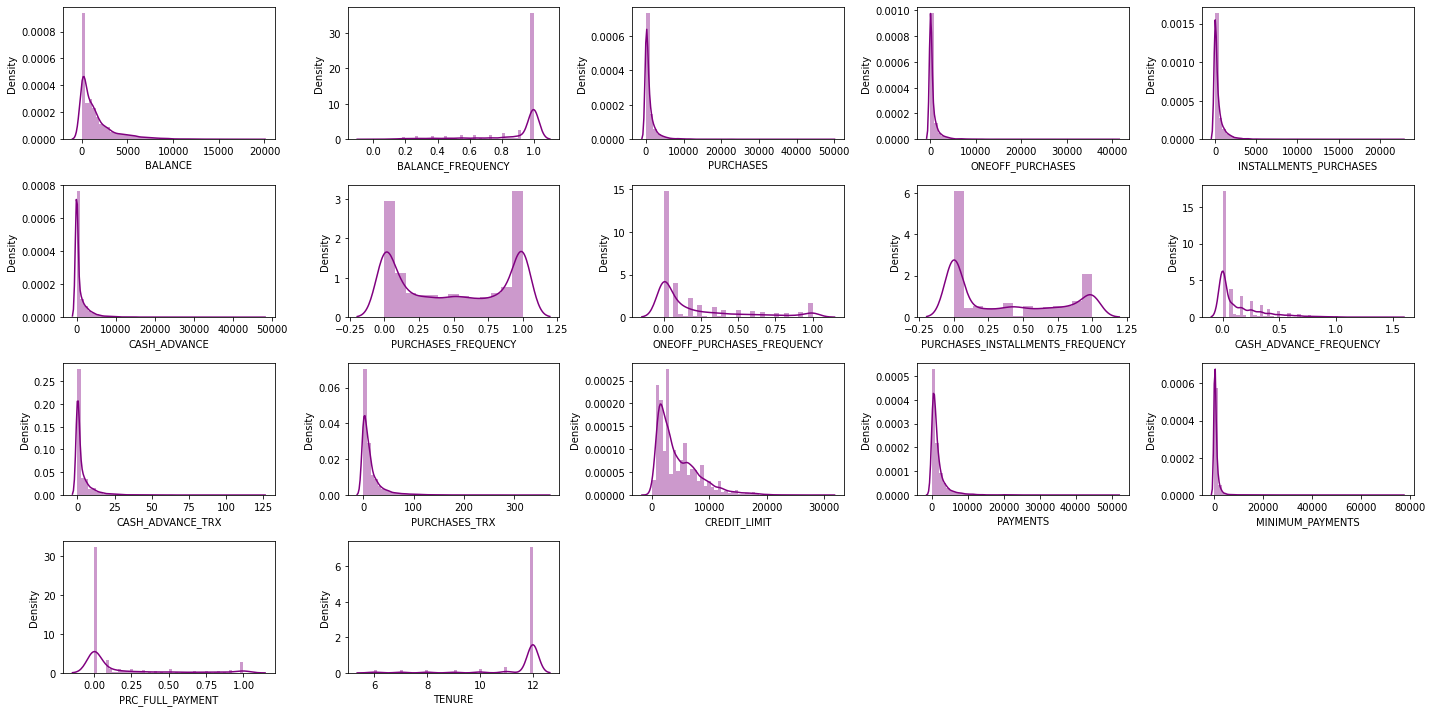

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.margins(1.5)
num = data.select_dtypes(include=['int64', 'float64']).columns
for i in range(0, len(num)):
    plt.subplot(4,5, i+1)
    sns.distplot(data[num[i]], color='purple')
    plt.tight_layout()
plt.show()

Observation:
1. Customer is dominated with balance from 0 to 5000
2. The data is dominated with customer who always renew their saldo
3.  Tha data is dominated with customer who doing purchase form 0 up to 1000

In [ ]:
data['TENURE'].value_counts()

12    7346
11     356
10     226
6      184
8      183
7      177
9      164
Name: TENURE, dtype: int64

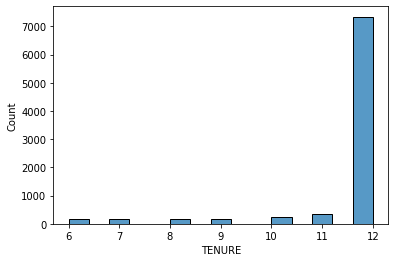

In [ ]:
sns.histplot(data = data, x = 'TENURE')

Observation:
1. 7346 customer can be described as loyal customer because they stay in bank for 12 years
2. Meanwhile, hundred customer stay in bank for 1-11 years

In [ ]:
col= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

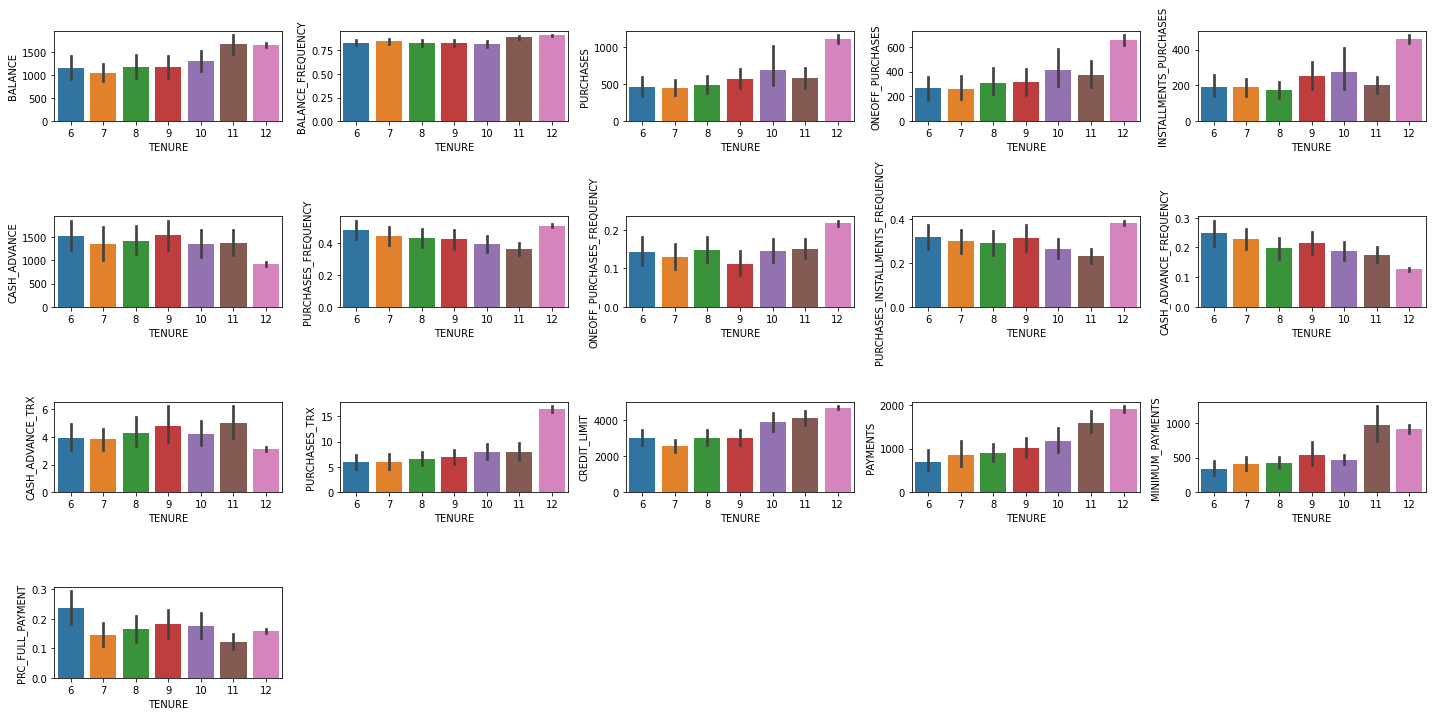

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.margins(1.5)

for i in range(0, len(col)):
    plt.subplot(4,5, i+1)
    sns.barplot(data=data,x=data['TENURE'],y=data[col[i]])
    plt.tight_layout()
plt.show()

Observation:
1. Customer with high loyalty has more balance than customer who not loyal
2. Customer with high tenure will have more purchase
3. Customer with high tenure will have more credit limit
4. Customer with 6 tenure will have more purchase frequency. The value of purchase frequency is decrease in higher tenure. But in 12 year tenure, the purchase frequency is increasing.
4. The higher tenure, the higher payments by customer


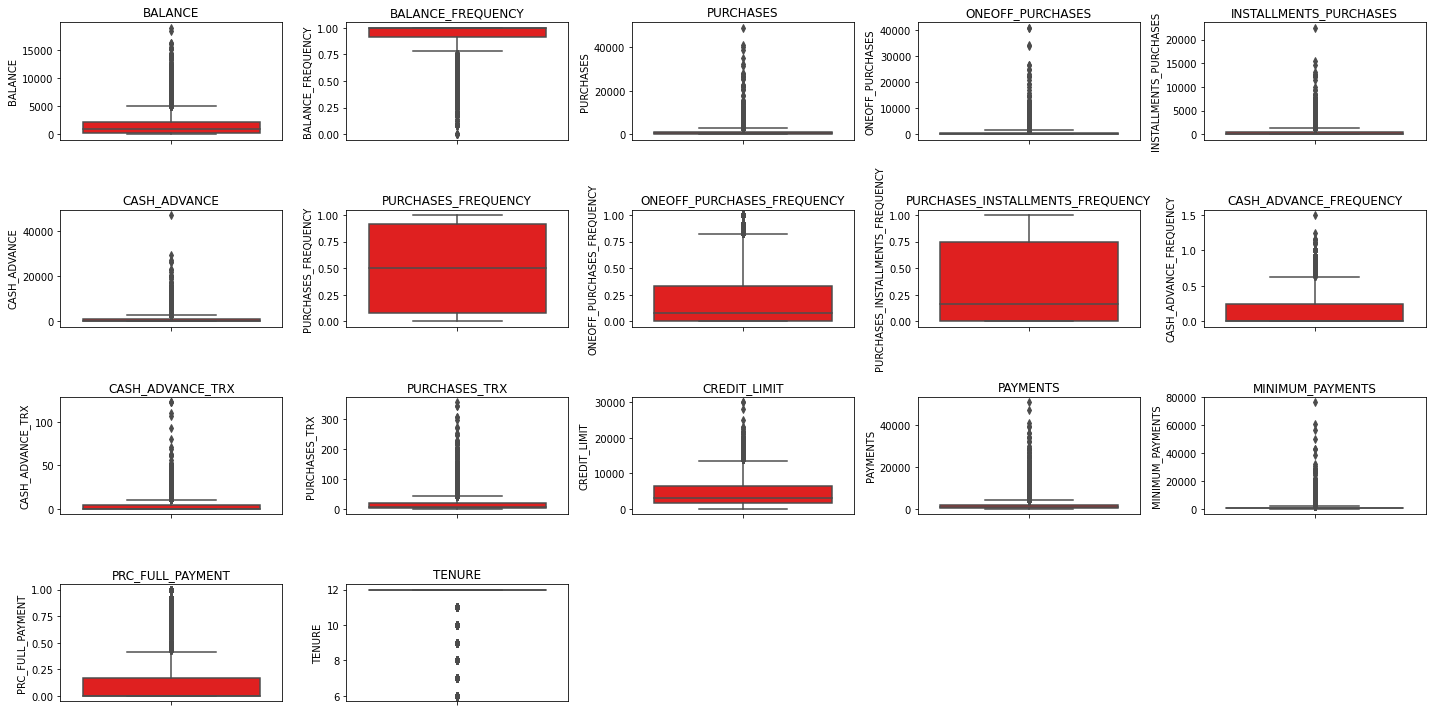

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.margins(1.5)
num = data.select_dtypes(include=['int64', 'float64']).columns
for i in range(0, len(num)):
    plt.subplot(4,5, i+1).set_title(num[i])
    sns.boxplot(y=data[num[i]], color='red')
    plt.tight_layout()
plt.show()

Observation:
There are many outlier in each column. SO we will not delete them, because maybe it contains meaningfull information for the next analysis.

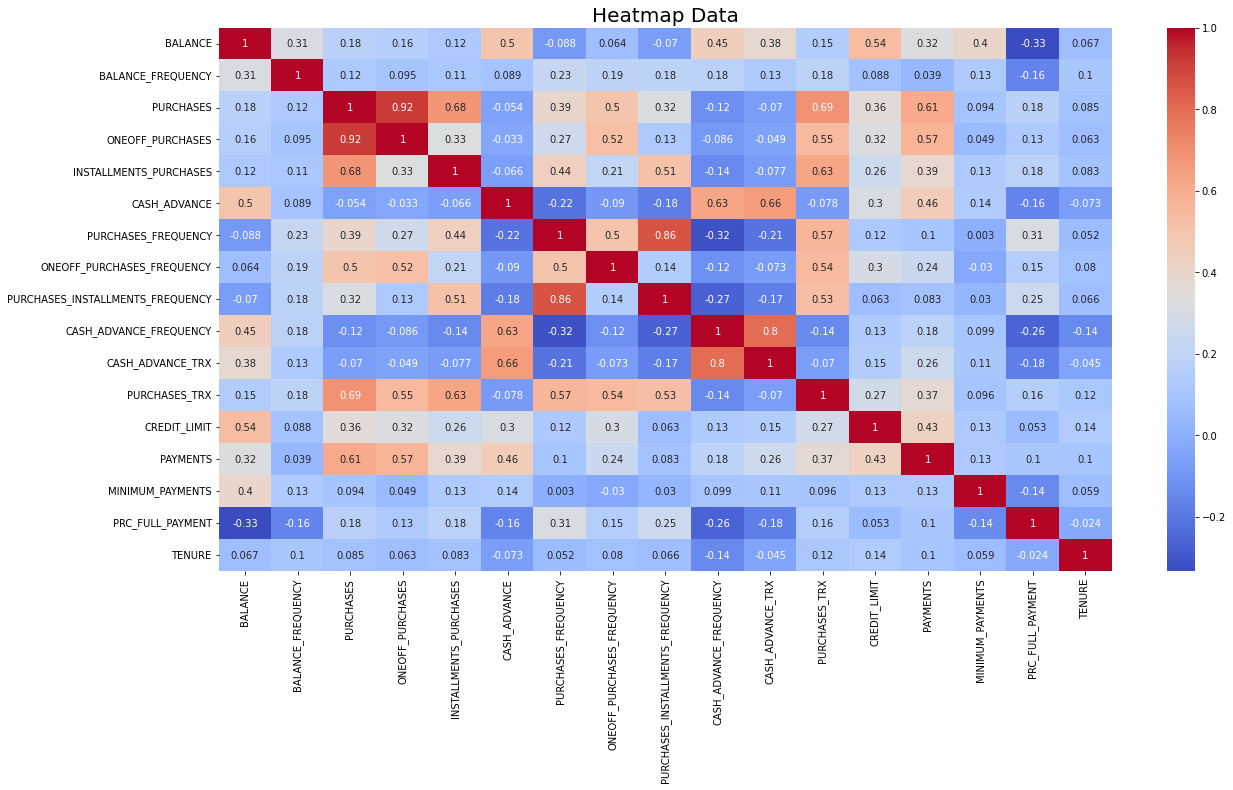

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap = 'coolwarm', annot = True,fmt=".2g")
plt.title('Heatmap Data', fontsize = 20)
plt.show()

Observation:
We can see that many feature correlated each other. It's hard to build model by choosing feature manually. So, we will use PCA to reduct the features. 

# Dimension Reduction using PCA

In [ ]:
clustering = data.copy()
clustering

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# Data Scaling
scaler = StandardScaler()



Scalling is a process to delete a gap bewtween column. 

In [ ]:
clustering[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]
clustering.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [ ]:
clustering.drop('TENURE',axis=1,inplace=True)
clustering.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000


In [ ]:
pca = PCA(n_components=2)
pca.fit(clustering)
pca_transform = pca.transform(clustering)
pca_transform

array([[-4391.44751025,   911.24746572],
       [ 4044.63420042, -2565.16017529],
       [ 1418.39482731, -1924.55718387],
       ...,
       [-4444.59286857,   905.46750679],
       [-4855.4227417 ,  1016.38464476],
       [-3685.09060485,  1559.63542498]])

In [ ]:
cluster_pca = pd.DataFrame(data=pca_transform,columns=['pca1','pca2'])
cluster_pca

,pca1,pca2
0,-4391.447510,911.247466
1,4044.634200,-2565.160175
2,1418.394827,-1924.557184
3,-3809.046727,728.326684
4,-1966.891246,850.605181
...,...,...
8631,-4853.632849,1050.840474
8632,-4272.993271,1113.435648
8633,-4444.592869,905.467507
8634,-4855.422742,1016.384645


In [ ]:
# check the explained variance
print('explained variance:',pca.explained_variance_ratio_)

explained variance: [0.47493168 0.17814416]


Observation:
From the reduction process using PCA, the missing information is 35%. 

# Modeliing

In [ ]:
Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_pca)
    Sum_of_squared_error.append(km.inertia_)

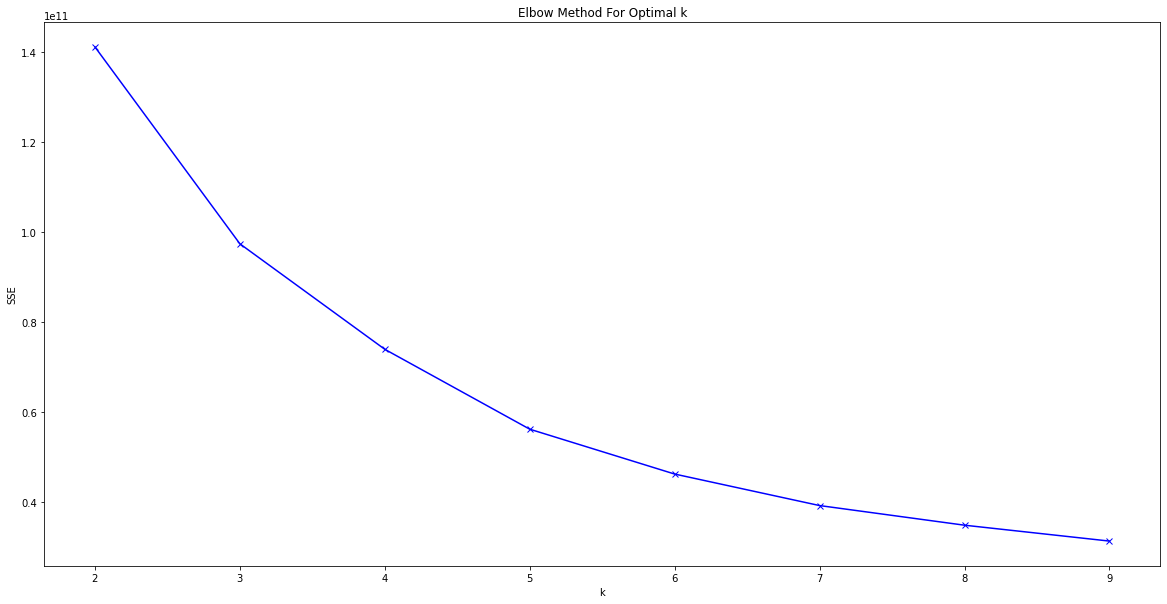

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

Observation:
From the graph above, we can see that the value of k cluster are k=3 or k=4. The model will be evaluated using silhotte method.

# Evaluation Model

In [ ]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_pca)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_pca, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))#

For n_clusters = 2, silhouette score is 0.5950467703769418
For n_clusters = 3, silhouette score is 0.5681513986460773
For n_clusters = 4, silhouette score is 0.5031587223028587
For n_clusters = 5, silhouette score is 0.5027788607127951
For n_clusters = 6, silhouette score is 0.5092220256918111
For n_clusters = 7, silhouette score is 0.4388497453062288
For n_clusters = 8, silhouette score is 0.4567516226615045
For n_clusters = 9, silhouette score is 0.45110735157233095


It can be seen that the value of K mean around 3 and 4. The result of model evaluation show that the silhoutte scire for the best k-mean located in k=2 with scor 59.50%. But, the most reasonable cluster is on k-3. 

In [ ]:
# Memodelkan data dengan k-means
kmean= KMeans(3)
kmean.fit(data)
labels=kmean.labels_

In [ ]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1


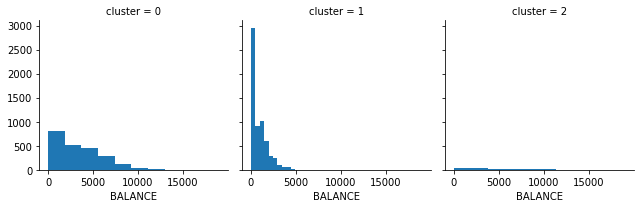

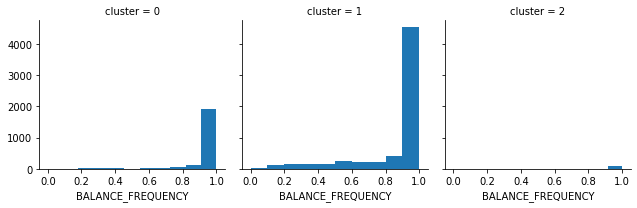

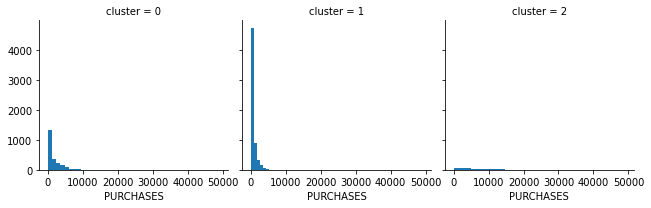

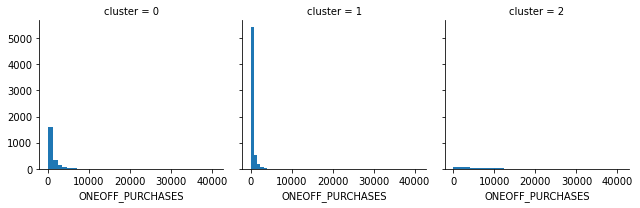

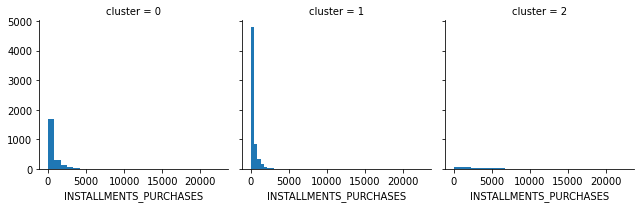

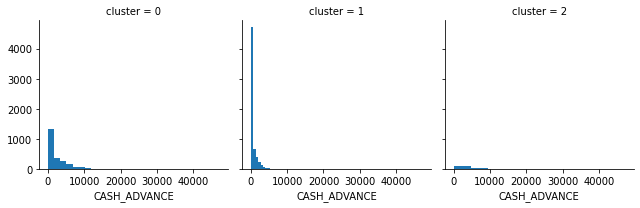

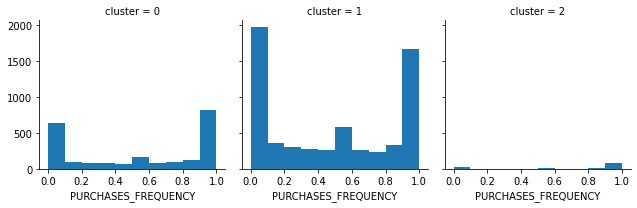

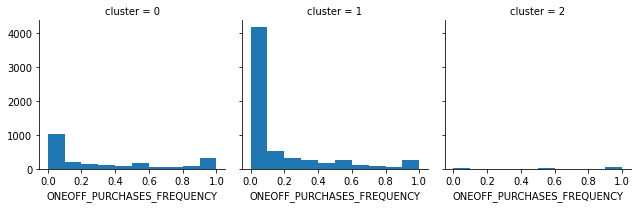

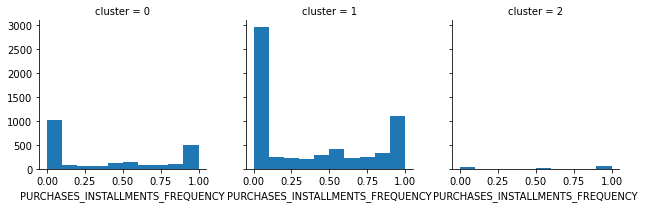

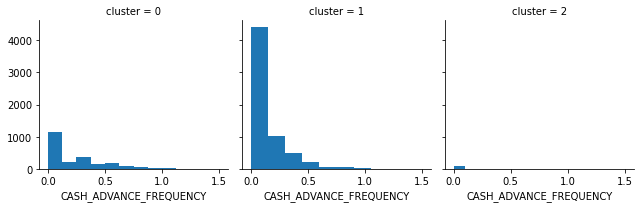

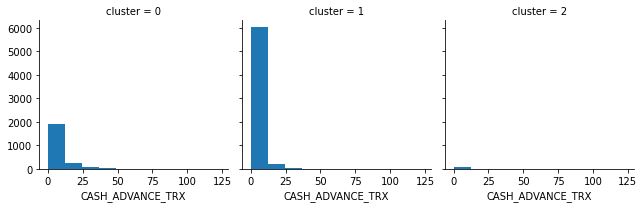

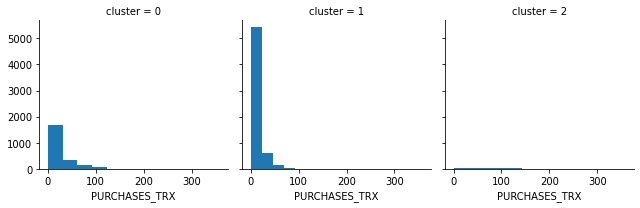

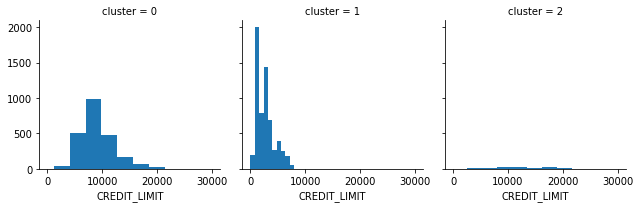

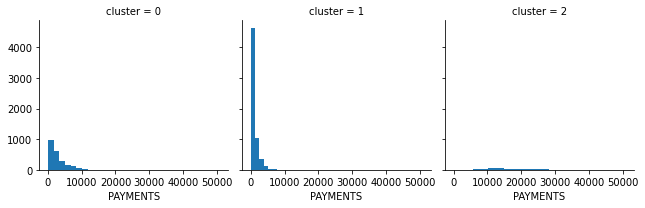

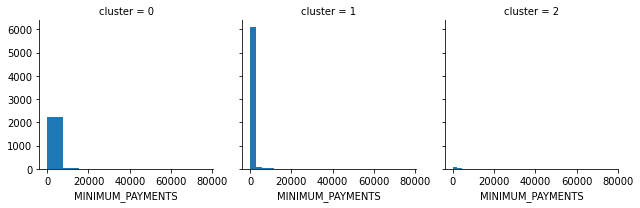

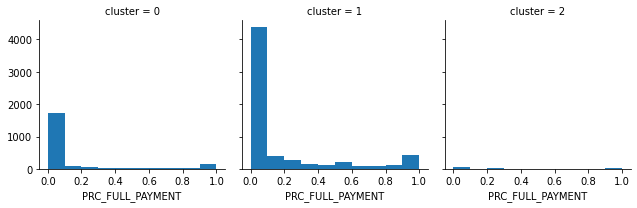

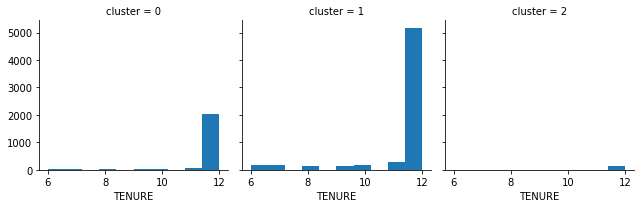

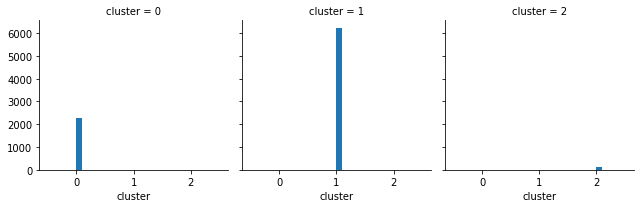

In [ ]:
for i in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, i)

In [ ]:
clusters.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,3418.568605,0.946473,1598.288580,996.350843,602.255373,2104.404022,0.544154,0.318999,0.389647,0.211814,5.790151,22.395297,8985.982496,2916.721442,1577.973638,0.136193,11.740905
1,876.929663,0.876065,616.500363,318.447208,298.364994,499.298350,0.473389,0.157014,0.356444,0.108853,2.294287,10.901104,2742.410559,1032.962410,572.624922,0.164022,11.453353
2,4833.015572,0.914621,10530.779774,7429.905414,3101.039774,5430.509513,0.742299,0.586639,0.597388,0.230829,9.255639,84.413534,12489.097744,17905.869447,2474.073451,0.329257,11.842105


**Cluster 0**

1. Balance : Medium
2. Balance frequency : high
3. Purchase : Medium
4. Purchase frequency : Medium
5. Minimum payment : Medium
6. Credit Limit : medium

**Cluster 1**
1. Balance : Low
2. Balance frequency : Low
3. Purchase : Low
4. Purchase frequency : Low
5. Minimum payment : Low
6. Credit Limit : Low

**Cluster 3**
1. Balance : High
2. Balance frequency : Medium
3. Purchase : High
4. Purchase frequency : High
5. Minimum payment : High
6. Credit Limit : High

Cluster 0 : This customer group indicates a small group of customers who have medium balances, medium spenders (medium purchase) with medium credit limit.

Cluster 1 : This customer group indicates a large group of customers who have low balances, low spenders (low purchase) with the lowest credit limit.

Cluster 2 : This customer group indicates a small group of customers who have high balances and cash advances, high purchase frequency with high credit limit. 

Conclusion:
1. For cluster 0, I recommended a gold credit card. The cardholder must have a regular monthly income of around 5 million to 10 million IDR. The credit limit ranges from 10 million to 40 million IDR, depending on the credit card issuing bank. The advantage of this type of card is the limit is large enough. So, it allows you to buy/own expensive items faster. You can use it to repay big-budget items such as motorbikes or smartphones. However, the higher the credit card limit, the higher the annual fee you have to pay.

2. For cluster 1, I recommended a silver credit card because it’s the most widely owned card. In general, a new credit cardholder will receive a silver card and they can upgrade it later. Silver cards have the lowest credit limit, which is around 4 million to 7 million IDR. The cardholder must have a monthly salary of at least 3 million IDR. The advantage of this card is the limit that is not too high.

3. Last, for cluster 2, I recommended a platinum credit card with the highest level. Platinum credit cards are only owned by a few people because it is not easy to get the card due to strict procedures. A platinum credit card has a high limit from 40 million up to 1 billion IDR. The cardholder must have an income of at least 180 million IDR per year and have a good credit history.

Refference:
https://medium.com/analytics-vidhya/credit-card-customers-segmentation-bc3c5c87ddc